# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Davyn Reinhard Santoso
- **Email:** davyn.reinhard@ui.ac.id
- **ID Dicoding:** davyn_reinhard_s

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi pola penggunaan sepeda dalam bike-sharing dalam sehari pada rentang jam tertentu, termasuk *peak hours* dan *off-peak hours*?
- Apakah masyarakat yang menggunakan sepeda adalah masyarakat yang melek akan teknologi?
- Apakah terdapat hubungan antara musim dan pola kepadatan penggunaan sepeda dalam bike-sharing?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

> 1. `day.csv`: merupakan salah satu dataset berisi jumlah penyewaan sepeda yang dikumpulkan dalam skala hari. Pendataan diambil dalam rentang waktu 731 hari

In [2]:
df_day = pd.read_csv("dataset/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


> 2. `hour.csv`: merupakan salah satu dataset berisi jumlah penyewaan sepeda yang dikumpulkan dalam skala jam. Pendataan diambil dalam rentang waktu 17379 jam

In [3]:
df_hour = pd.read_csv("dataset/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### 1. Melakukan *assessing data* pada `day.csv`

> #### Memeriksa Informasi statistik deskriptif data

In [4]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


> Berdasarkan deskripsi statistik, saya dapat melihat bahwa  selisih nilai mean-median pada atribut *registered* terbilang kecil, sehingga kita bisa mengetahui bahwa distribusi data atribut `registered` bersifat normal. Disini, dapat ditarik kesimpulan bahwa penggunaan bike-sharing cenderung stabil dalam tiap - tiap harinya.

#### Memeriksa Informasi tipe data numerik dan kategorikal

In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


> Melalui informasi tipe data dari dataset, terdapat beberapa atribut yang dapat direpresentasikan melalui data aslinya dan bersifat kategorikal untuk meningkatkan nilai keterbacaan statisik. Skala nilai tersebut ada pada atribut `season`, `weekday`, `month`, dan `weathersit`.

> Selain itu, khusus untuk atribut `dteday` akan ditransformasikan ke dalam tipe data *date*, karena masih bertipe *object*. Hal ini penting untuk mendukung analisis dari dataset agar dapat dijadikan sebagai kalkulasi.

> #### Memeriksa nilai yang hilang atau missing values pada dataset

In [6]:
col_na = df_day.isnull().sum().sort_values(ascending=False)

col_na

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

> Dari data di atas, dapat dilihat bahwa tiap - tiap atribut tidak memiliki *missing values*

> #### Memeriksa duplikasi data

In [7]:
duplicated_df_day = df_day.duplicated()

list(duplicated_df_day).count(True)

0

> Dari data di atas, dapat dilihat bahwa tiap - tiap atribut tidak memiliki nilai duplikat

### 2. Melakukan *assessing data* pada `hour.csv`

> #### Memeriksa Informasi statistik deskriptif data

In [8]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


> Berdasarkan deskripsi statistik, saya dapat melihat bahwa  selisih nilai mean-median pada atribut *registered* terbilang cukup besar, sehingga kita bisa mengetahui bahwa distribusi data atribut `registered` bersifat kurang normal, terutama untuk pengguna berdasarkan jam. Dapat ditarik kesimpulan bahwa terdapat fluktuasi yang cukup tinggi di antara tiap - tiap jam penggunaan bike-sharing di dalam satu hari.

#### Memeriksa Informasi tipe data numerik dan kategorikal

In [9]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


> Melalui informasi tipe data dari dataset, terdapat beberapa atribut yang dapat direpresentasikan melalui data aslinya dan bersifat kategorikal untuk meningkatkan nilai keterbacaan statisik. Skala nilai tersebut ada pada atribut `season`, `weekday`, `month`, dan `weathersit`.

> Selain itu, khusus untuk atribut `dteday` akan ditransformasikan ke dalam tipe data *date*, karena masih bertipe *object*. Hal ini penting untuk mendukung analisis dari dataset agar dapat dijadikan sebagai kalkulasi.

> Atribut `temp`, `atemp`, dan `hum`, perlu diubah ke dalam bentuk aslinya karena telah dinormalisasi, sehingga dapat dilakukan visualisasi data sesuai dengan angka yang nyata.



> #### Memeriksa nilai yang hilang atau missing values pada dataset

In [10]:
col_na = df_hour.isnull().sum().sort_values(ascending=False)

col_na

instant       0
weathersit    0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
workingday    0
dteday        0
weekday       0
holiday       0
hr            0
mnth          0
yr            0
season        0
cnt           0
dtype: int64

> Dari data di atas, dapat dilihat bahwa tiap - tiap atribut tidak memiliki *missing values*

> #### Memeriksa duplikasi data

In [11]:
duplicated_df_hour = df_day.duplicated()

list(duplicated_df_hour).count(True)

0

> Dari data di atas, dapat dilihat bahwa tiap - tiap atribut tidak memiliki nilai duplikat

### Cleaning Data

### 1. Melakukan *cleaning data* pada `day.csv`

> #### Melakukan konversi untuk atribut `date` menuju tipe data *date*

In [12]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


> #### Melakukan konversi untuk atribut `season`, `weekday`, `month`, dan `weathersit` menuju bentuk aslinya

In [13]:
# Konversi Season

dict_season = {
    1:'Winter',
    2:'Spring',
    3:'Summer',
    4:'Fall'
  }

if df_day['season'].dtype != object:
  df_day['season'] = df_day['season'].map(dict_season)

df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
# Konversi Weekday

df_day['weekday'] = df_day['dteday'].dt.day_name()

df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,0,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,0,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
# Konversi Month

df_day['mnth'] = df_day['dteday'].dt.month_name()

df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,0,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,0,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
# Konversi Weather Situation

dict_weathersit = {
    1:'Sunny',
    2:'Cloudy',
    3:'Light Rainy, Snowy, or Stormy',
    4:'Heavy Rainy, Snowy, or Stormy'
  }

if df_day['weathersit'].dtype != object:
  df_day['weathersit'] = df_day['weathersit'].map(dict_weathersit)

df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,Saturday,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,January,0,Sunday,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,January,0,Monday,1,Sunny,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,0,January,0,Tuesday,1,Sunny,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,0,January,0,Wednesday,1,Sunny,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### 2. Melakukan *cleaning data* pada `hour.csv`

> #### Melakukan konversi untuk atribut `date` menuju tipe data *date*

In [17]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


> #### Melakukan konversi untuk atribut `season`, `weekday`, `month`, dan `weathersit` menuju bentuk aslinya

In [18]:
# Konversi Season

dict_season = {
    1:'Winter',
    2:'Spring',
    3:'Summer',
    4:'Fall'
  }

if df_hour['season'].dtype != object:
  df_hour['season'] = df_hour['season'].map(dict_season)

df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
# Konversi Weekday

df_hour['weekday'] = df_hour['dteday'].dt.day_name()

df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
# Konversi Month

df_hour['mnth'] = df_hour['dteday'].dt.month_name()

df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
# Konversi Weather Situation

dict_weathersit = {
    1:'Sunny',
    2:'Cloudy',
    3:'Light Rainy, Snowy, or Stormy',
    4:'Heavy Rainy, Snowy, or Stormy'
  }

if df_hour['weathersit'].dtype != object:
  df_hour['weathersit'] = df_hour['weathersit'].map(dict_weathersit)

df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,Sunny,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,Sunny,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,Sunny,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,January,3,0,Saturday,0,Sunny,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,January,4,0,Saturday,0,Sunny,0.24,0.2879,0.75,0.0,0,1,1


> Melakukan konversi data yang sudah dibersihkan dalam bentuk `.csv`

In [22]:
df_day.to_csv("dataset/day_cleaned.csv", index=False)
df_hour.to_csv("dataset/hour_cleaned.csv", index=False)

## Exploratory Data Analysis (EDA) & Visualization

### Bagaimana distribusi pola penggunaan sepeda dalam bike-sharing dalam sehari pada rentang jam tertentu, termasuk *peak hours* dan *off-peak hours*?

> #### Bar Chart Frekuensi Pola Pengunaan Sepeda

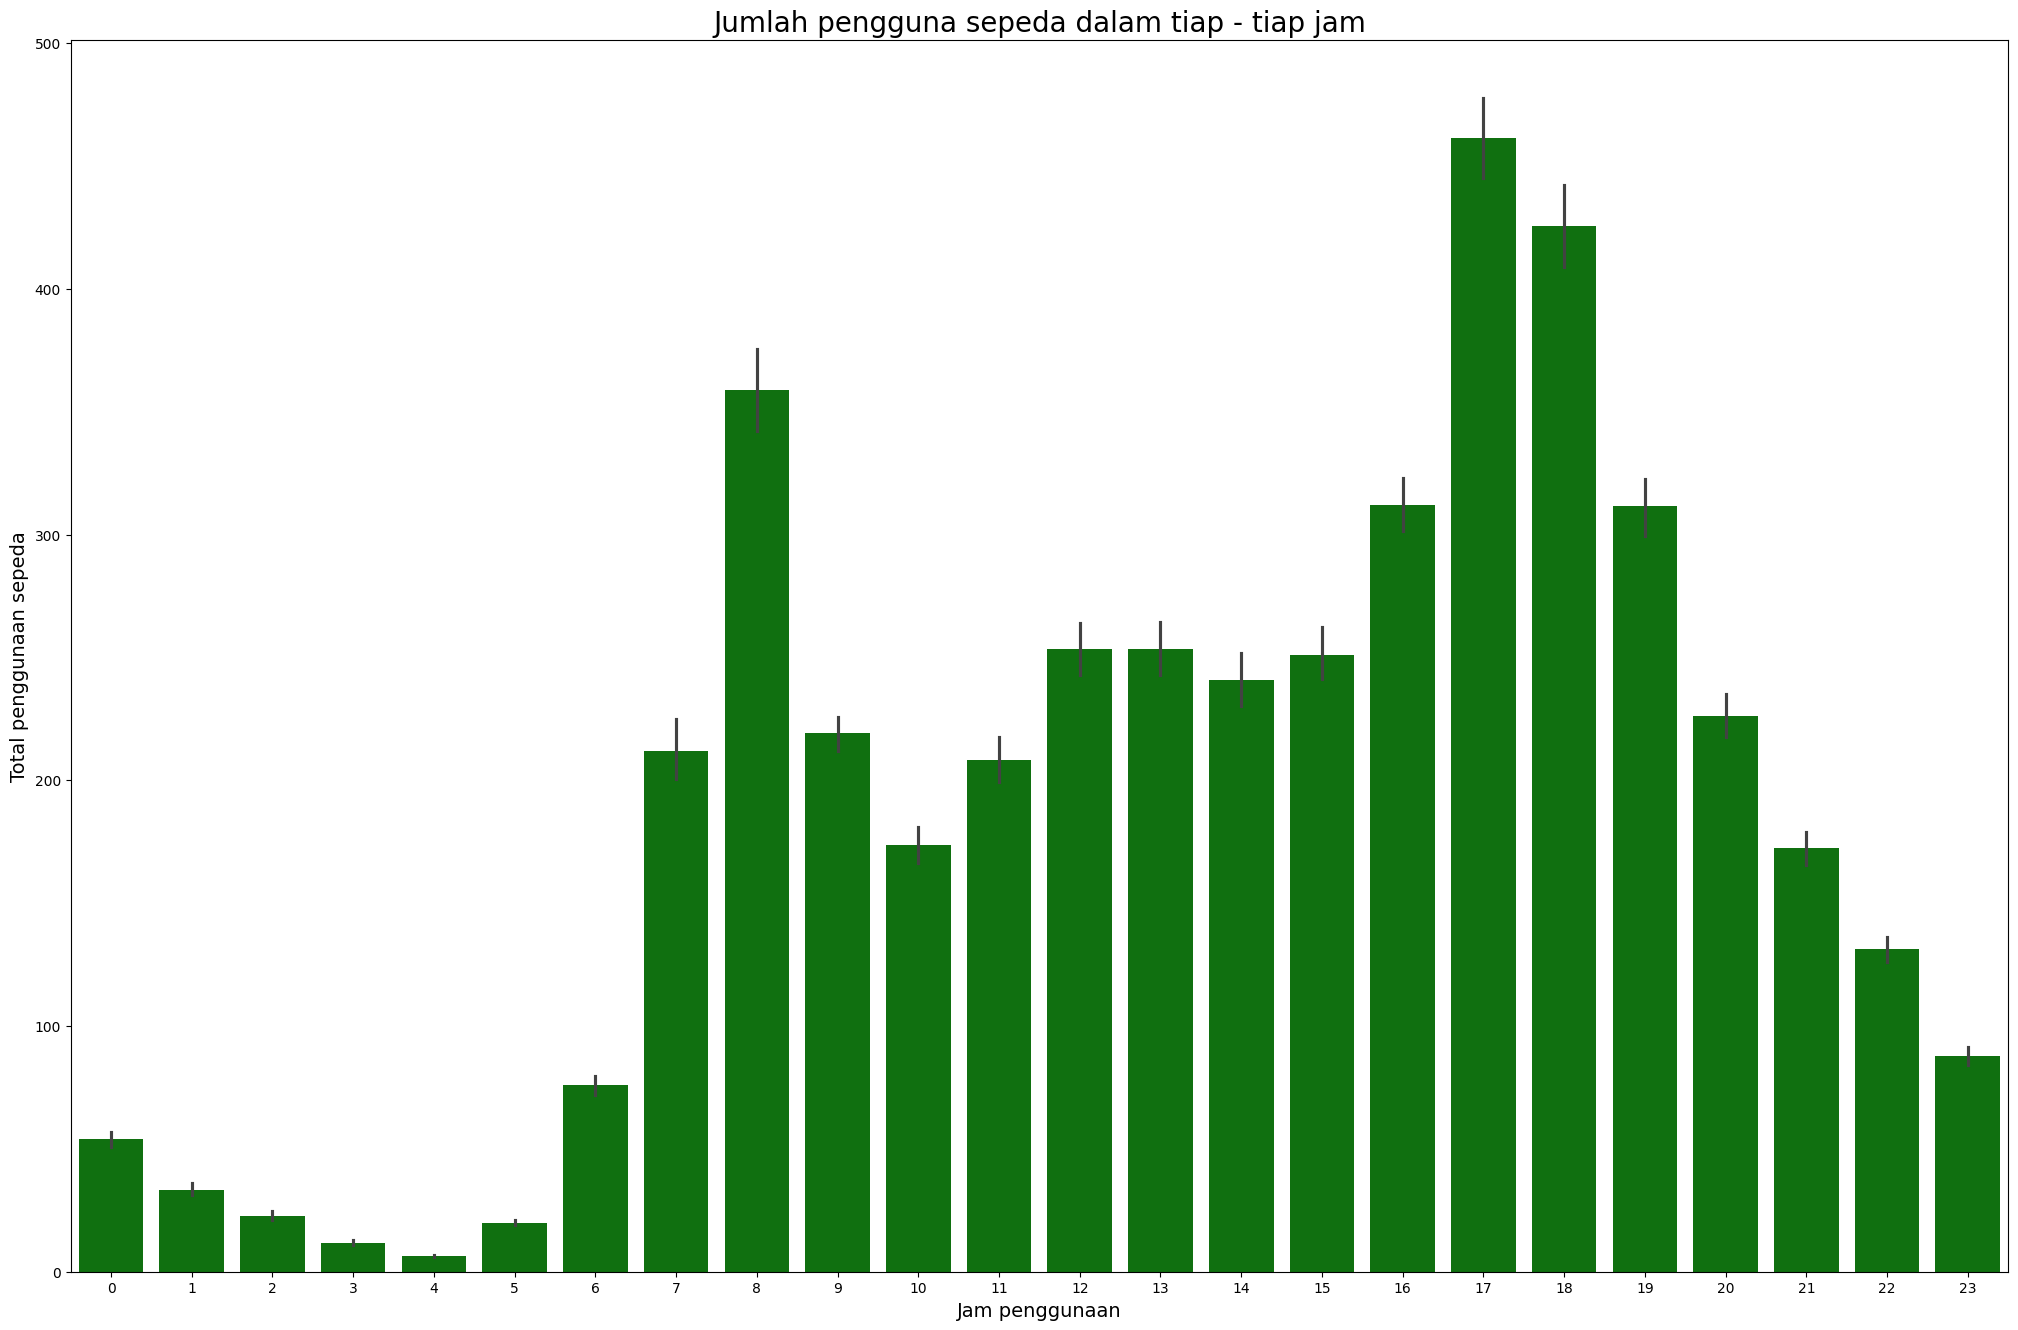

In [23]:
df_hours_usage = df_hour[['hr', 'holiday' , 'cnt']].copy()

df_hours_usage.groupby("hr").agg({
    "cnt": "sum"
})


plt.figure(figsize=(25, 16))
plt.yticks(size=10)
plt.xticks(size=10)
plt.xlabel("Jam penggunaan", fontsize=14)
plt.ylabel("Total penggunaan sepeda", fontsize=14)
plt.title("Jumlah pengguna sepeda dalam tiap - tiap jam", fontsize=20)
sns.barplot(y='cnt', x='hr', data=df_hours_usage, color='green')
plt.show()

### Apakah masyarakat yang menggunakan sepeda adalah masyarakat yang melek akan teknologi?

> #### Line Chart Frekuensi Perbandingan Pengunaan Sistem dan Sepeda

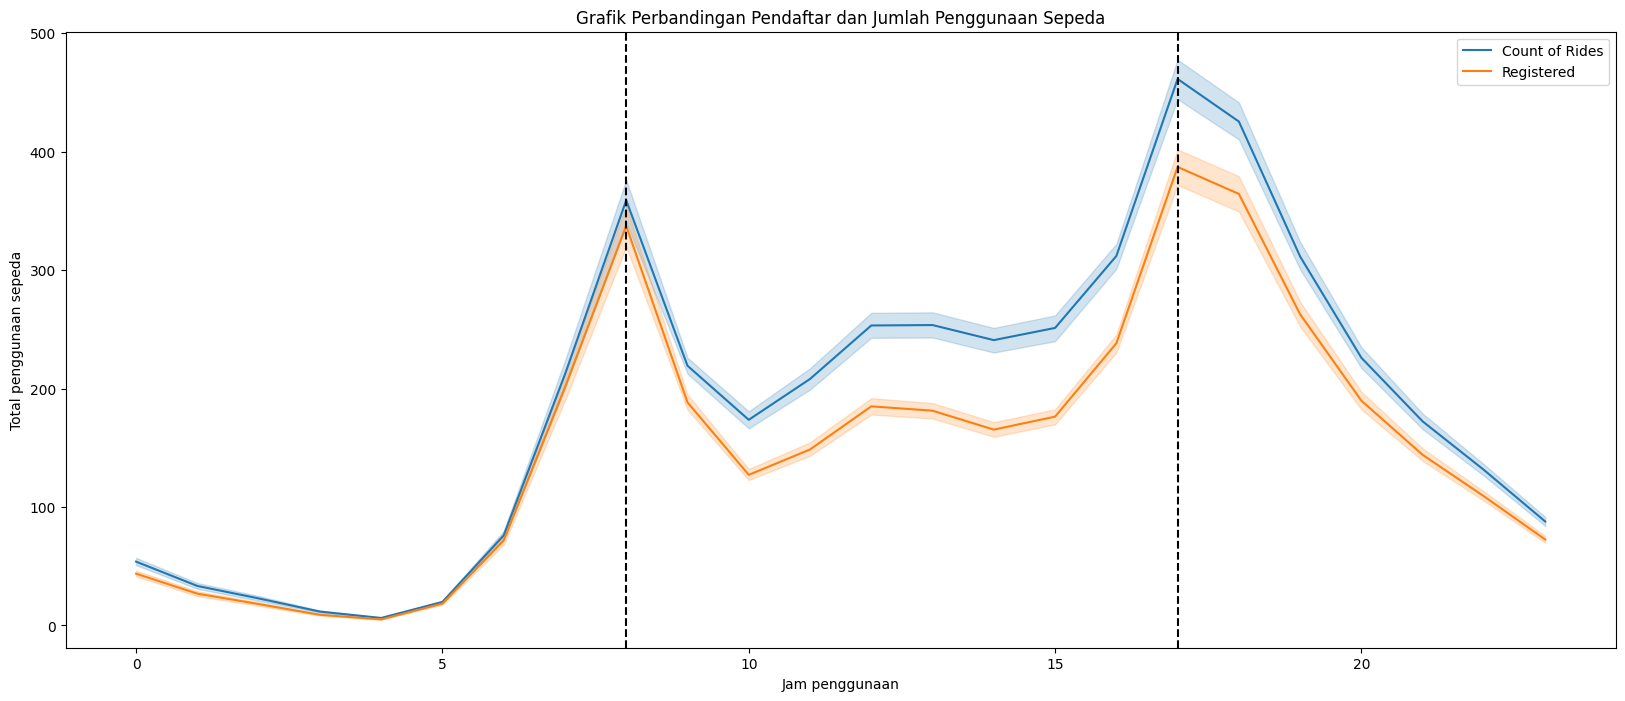

In [24]:
df_hours_comparison = df_hour[['hr', 'registered', 'cnt']].copy()

plt.figure(figsize=(20,8))

plt.xlabel("Jam penggunaan")
plt.ylabel("Total penggunaan sepeda")
plt.title("Grafik Perbandingan Pendaftar dan Jumlah Penggunaan Sepeda")


sns.lineplot(x="hr", y="cnt", data=df_hours_comparison, label='Count of Rides')
sns.lineplot(x="hr", y="registered", data=df_hours_comparison, label='Registered')

plt.axvline(x=8, color='black', linestyle='--')
plt.axvline(x=17, color='black', linestyle='--')

plt.show()

### Apakah terdapat hubungan antara musim dan pola kepadatan penggunaan sepeda dalam bike-sharing?

> #### Heatmap Korelasi Pengunaan sepeda dengan atribut yang menunjukkan indikator musim

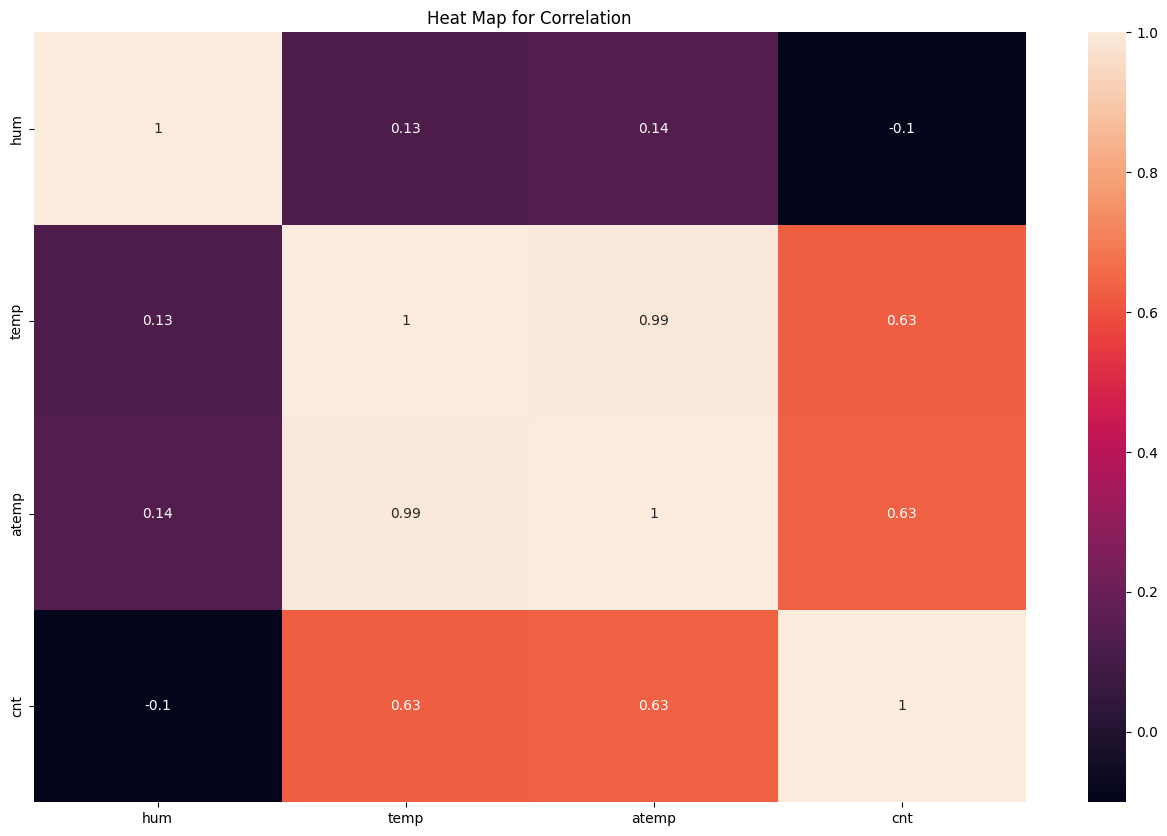

In [25]:
df_day_correlation = df_day[['season', 'hum', 'temp', 'atemp', 'cnt']].copy()

plt.figure(figsize=(16, 10))
sns.heatmap(df_day_correlation.corr(numeric_only=True), annot=True)

plt.title( "Heat Map for Correlation" )
plt.show()

> #### Bar Chart Pengunaan sepeda dengan atribut yang menunjukkan indikator musim

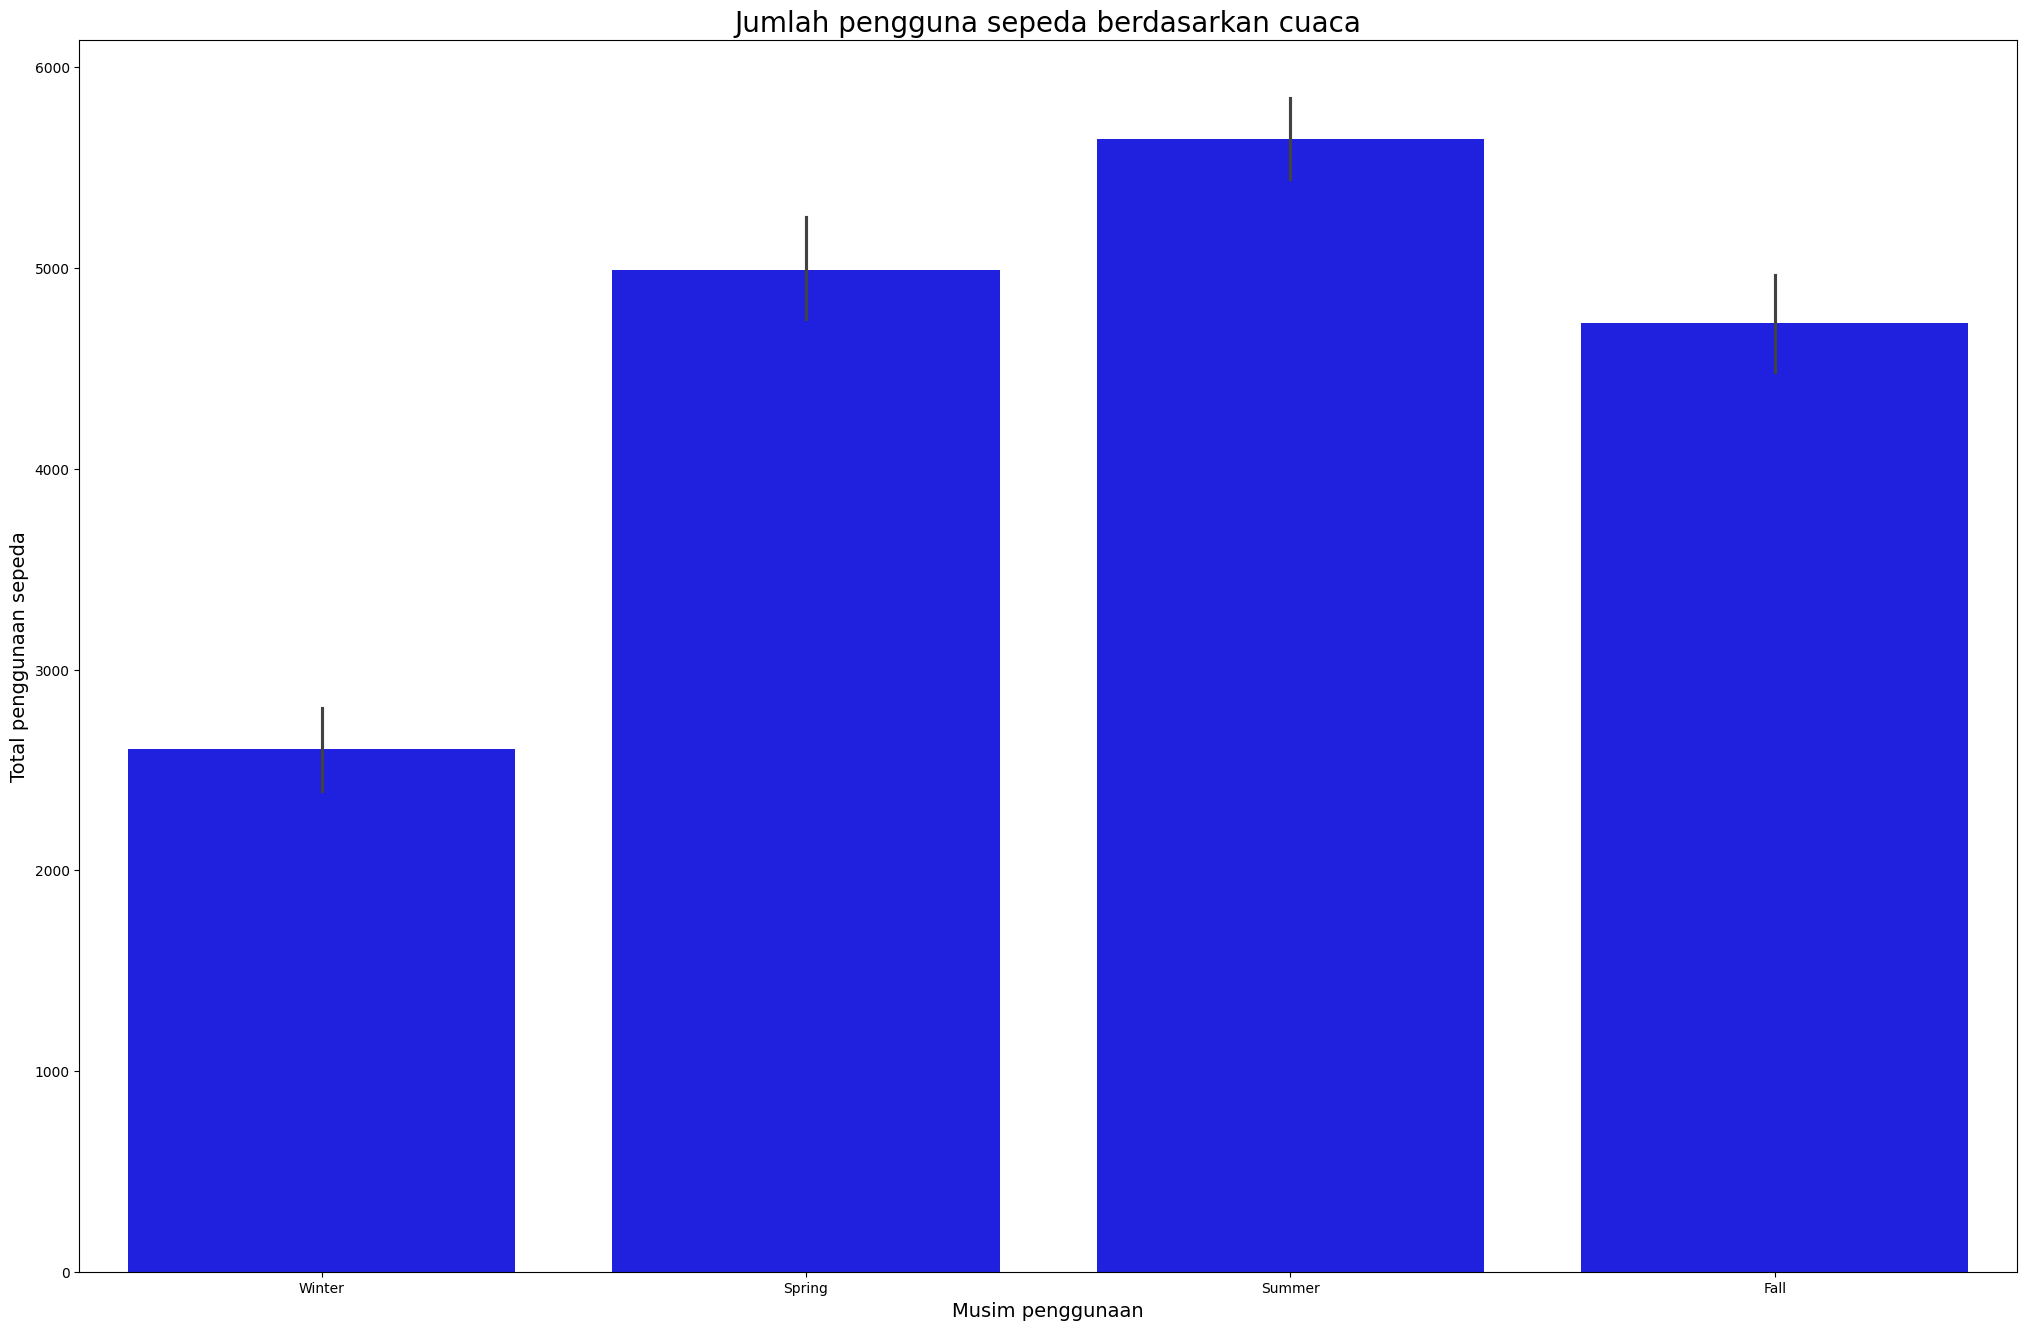

In [26]:
df_season_usage = df_day[['season', 'cnt']].copy()

df_season_usage.groupby("season").agg({
    "cnt": "sum"
})

df_season_usage

plt.figure(figsize=(25, 16))
plt.yticks(size=10)
plt.xticks(size=10)
plt.xlabel("Musim penggunaan", fontsize=14)
plt.ylabel("Total penggunaan sepeda", fontsize=14)
plt.title("Jumlah pengguna sepeda berdasarkan cuaca", fontsize=20)
sns.barplot(y='cnt', x='season', data=df_season_usage, color='blue')
plt.show()

> #### Scatter Plot Pengunaan sepeda dengan atribut yang menunjukkan indikator musim

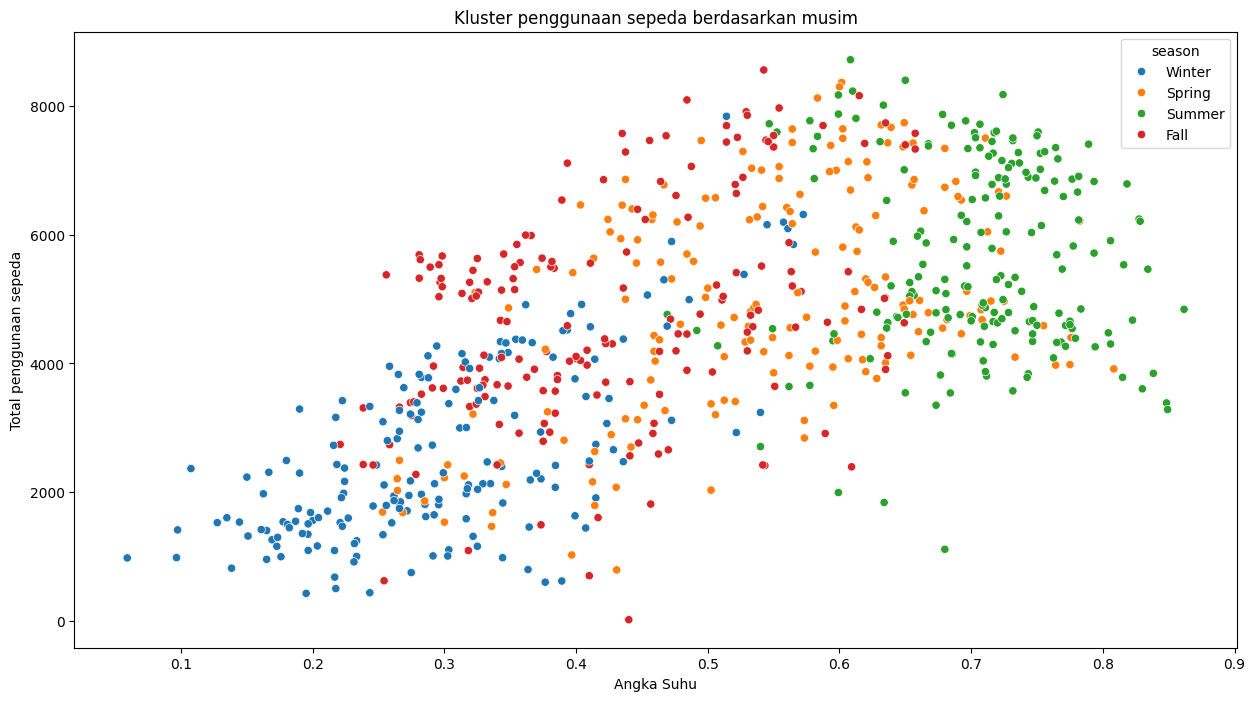

In [27]:
plt.figure(figsize=(15,8))

sns.scatterplot(x='temp', y='cnt', data=df_day_correlation, hue='season')

plt.xlabel("Angka Suhu")
plt.ylabel("Total penggunaan sepeda")
plt.title("Kluster penggunaan sepeda berdasarkan musim")

plt.show()

## Conclusion

- Bagaimana distribusi pola penggunaan sepeda dalam bike-sharing dalam sehari pada rentang jam tertentu, termasuk *peak hours* dan *off-peak hours*?

> Sesuai dengan analisis di atas, pola distribusi penggunaan sepeda dalam sehari menunjukkan pola kenaikan yang cukup tinggi pada jam 08.00, 17.00, dan 18.00. Hal ini dapat menyiratkan bahwa rata - rata pengguna bike-sharing adalah **para pekerja**

- Apakah masyarakat yang menggunakan sepeda adalah masyarakat yang melek akan teknologi?

> Dalam line chart di atas, terdapat visualisasi perbandingan untuk jumlah pengguna sepeda dan pengguna yang melakukan pendaftaran terhadap aplikasi. Hasilnya, tidak terdapat perbedaan yang jauh di antara angka keduanya, menyiratkan bahwa hampir sebagian besar pengguna telah melek akan teknologi dan dapat menggunakan sistem secara lancar.

- Apakah terdapat hubungan antara musim dan pola kepadatan penggunaan sepeda dalam bike-sharing?

> Melalui visualisasi kluster di atas, dapat dilihat bahwa sebagian besar pengguna menggunakan sepeda pada tiap musim, kecuali pada musim winter atau dingin.